In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.isnull().sum() #no missing values :)

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


<Axes: >

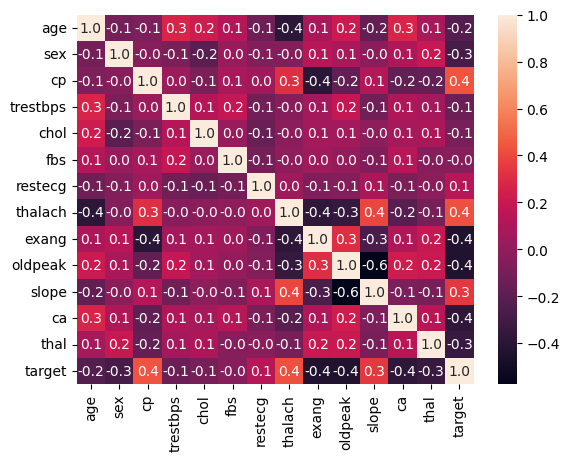

In [66]:
import seaborn as sns
corr=df.corr()
sns.heatmap(corr,annot=True,fmt='.1f')

In [6]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('target',axis=1),df['target'],test_size=0.2,random_state=42)

In [14]:
x_train.shape

(820, 13)

In [15]:
x_test.shape

(205, 13)

In [17]:
#no need of any standardization as we are implementing decision tree
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()


In [18]:
dc.fit(x_train,y_train)


DecisionTreeClassifier()

In [20]:
y_pred=dc.predict(x_test)

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9853658536585366
[[102   0]
 [  3 100]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



Visualize the tree

[Text(0.5315126050420168, 0.9545454545454546, 'cp <= 0.5\ngini = 0.499\nsamples = 820\nvalue = [397, 423]\nclass = disease'),
 Text(0.28781512605042014, 0.8636363636363636, 'ca <= 0.5\ngini = 0.371\nsamples = 398\nvalue = [300, 98]\nclass = no disease'),
 Text(0.4096638655462185, 0.9090909090909092, 'True  '),
 Text(0.18907563025210083, 0.7727272727272727, 'thal <= 2.5\ngini = 0.5\nsamples = 177\nvalue = [87, 90]\nclass = disease'),
 Text(0.09243697478991597, 0.6818181818181818, 'exang <= 0.5\ngini = 0.354\nsamples = 100\nvalue = [23, 77]\nclass = disease'),
 Text(0.03361344537815126, 0.5909090909090909, 'thalach <= 96.5\ngini = 0.146\nsamples = 63\nvalue = [5, 58]\nclass = disease'),
 Text(0.01680672268907563, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = no disease'),
 Text(0.05042016806722689, 0.5, 'chol <= 316.5\ngini = 0.064\nsamples = 60\nvalue = [2, 58]\nclass = disease'),
 Text(0.03361344537815126, 0.4090909090909091, 'gini = 0.0\nsamples = 56\nvalue = [0, 56]\nclass =

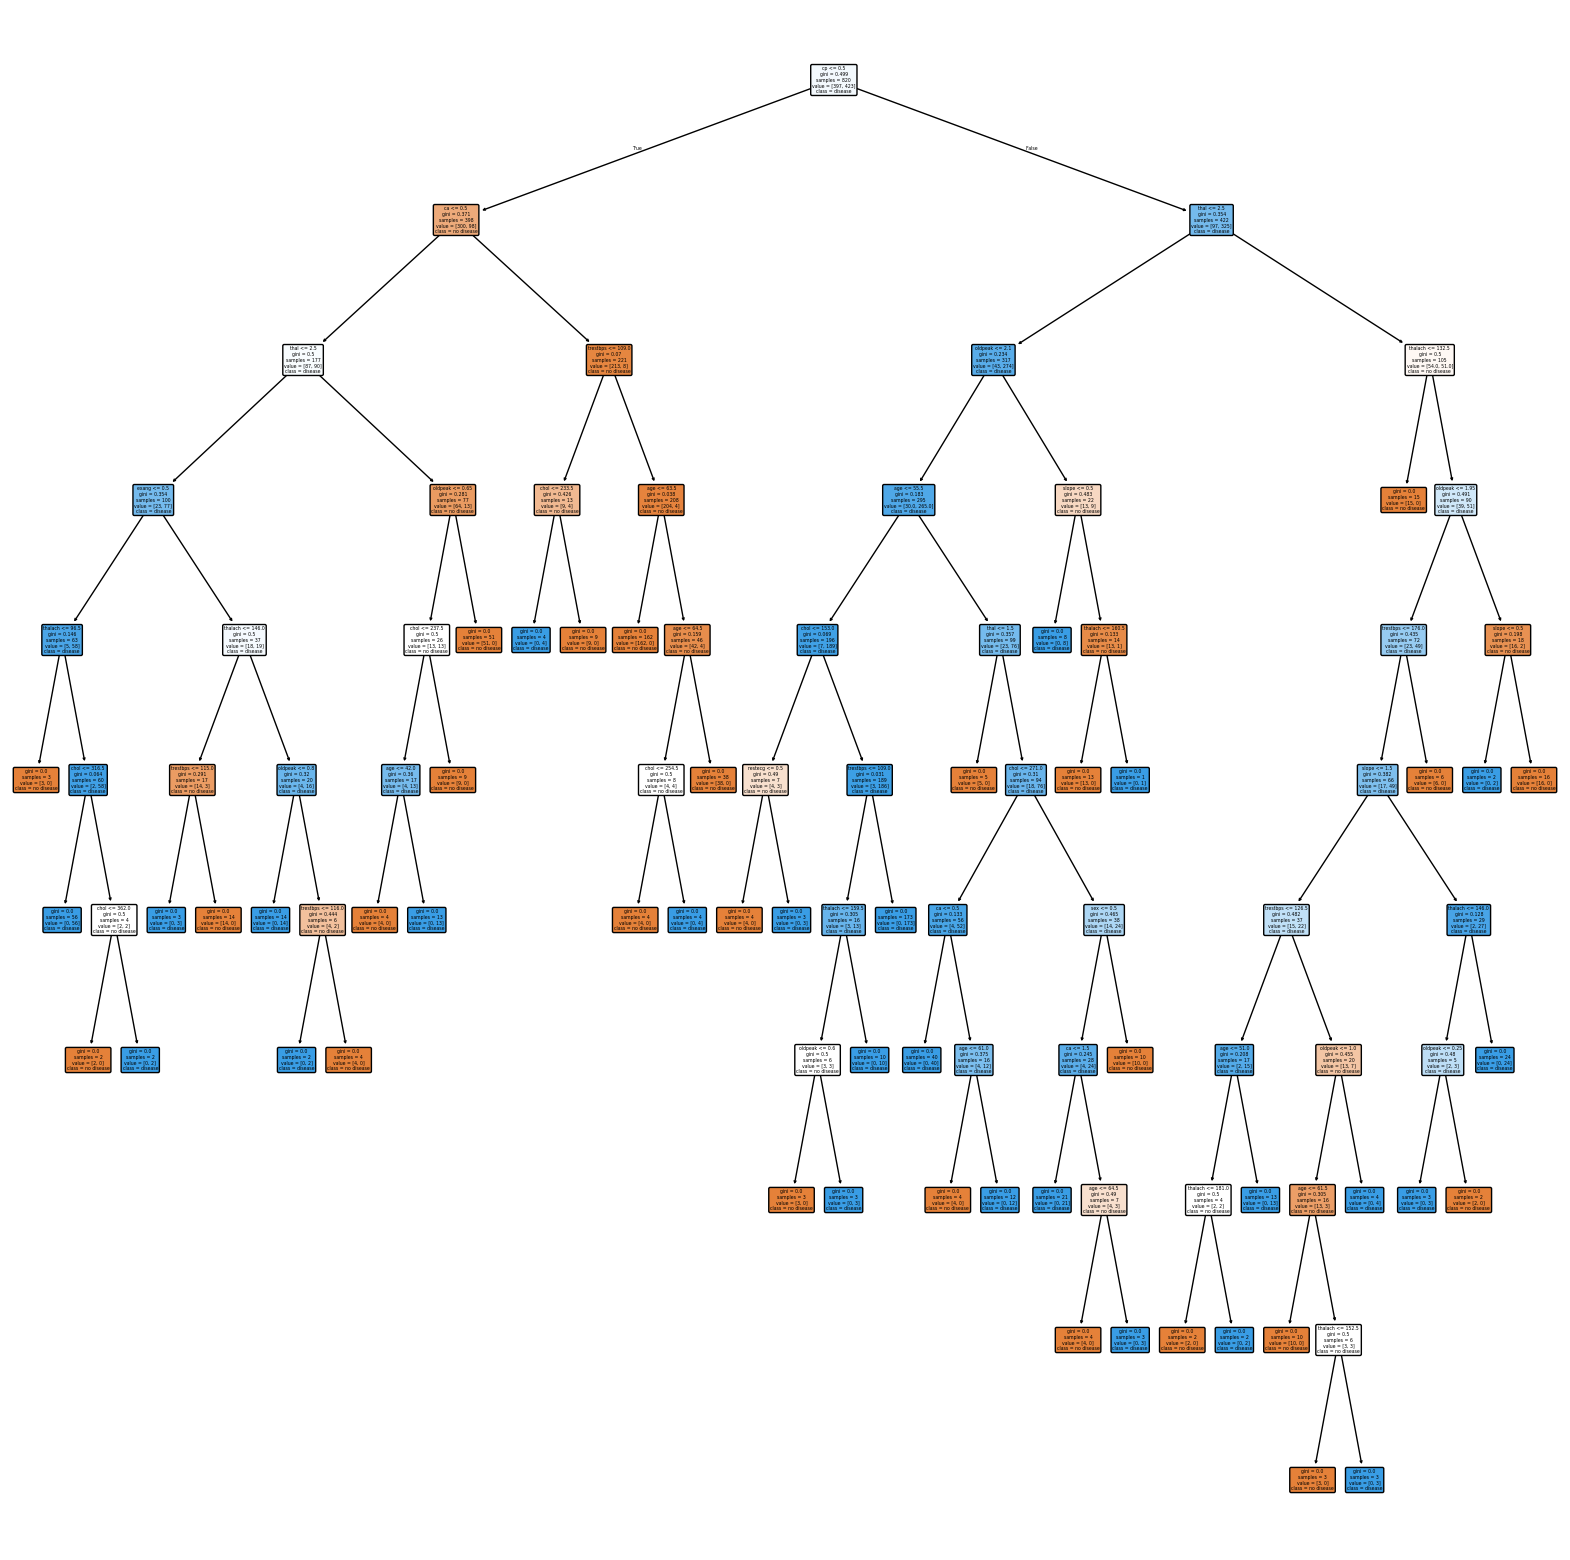

In [25]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
plot_tree(dc,filled=True,feature_names=df.drop('target',axis=1).columns,class_names=['no disease','disease'],rounded=True)

performance at diff depths

In [26]:
dept=range(1,20)
train_score=[]
test_score=[]

for depth in dept:
  dc=DecisionTreeClassifier(max_depth=depth)
  dc.fit(x_train,y_train)
  train_score.append(dc.score(x_train,y_train))
  test_score.append(dc.score(x_test,y_test))

In [28]:
train_score
test_score

[0.751219512195122,
 0.6780487804878049,
 0.7804878048780488,
 0.8,
 0.8439024390243902,
 0.8829268292682927,
 0.9121951219512195,
 0.975609756097561,
 0.9804878048780488,
 0.9853658536585366,
 0.9853658536585366,
 0.9853658536585366,
 0.9853658536585366,
 0.9853658536585366,
 0.9853658536585366,
 0.9853658536585366,
 0.9853658536585366,
 0.9853658536585366,
 0.9853658536585366]

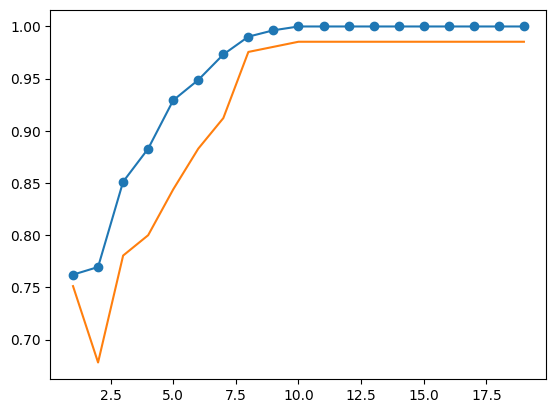

In [36]:
plt.plot(dept, train_score,'-o')
plt.plot(dept, test_score,)

In [37]:
best_depth=test_score.index(max(test_score))+1

In [38]:
best_depth

10

0.9853658536585366
[[102   0]
 [  3 100]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



[Text(0.5315126050420168, 0.9545454545454546, 'cp <= 0.5\ngini = 0.499\nsamples = 820\nvalue = [397, 423]\nclass = disease'),
 Text(0.28781512605042014, 0.8636363636363636, 'ca <= 0.5\ngini = 0.371\nsamples = 398\nvalue = [300, 98]\nclass = no disease'),
 Text(0.4096638655462185, 0.9090909090909092, 'True  '),
 Text(0.18907563025210083, 0.7727272727272727, 'thal <= 2.5\ngini = 0.5\nsamples = 177\nvalue = [87, 90]\nclass = disease'),
 Text(0.09243697478991597, 0.6818181818181818, 'exang <= 0.5\ngini = 0.354\nsamples = 100\nvalue = [23, 77]\nclass = disease'),
 Text(0.03361344537815126, 0.5909090909090909, 'thalach <= 96.5\ngini = 0.146\nsamples = 63\nvalue = [5, 58]\nclass = disease'),
 Text(0.01680672268907563, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = no disease'),
 Text(0.05042016806722689, 0.5, 'chol <= 316.5\ngini = 0.064\nsamples = 60\nvalue = [2, 58]\nclass = disease'),
 Text(0.03361344537815126, 0.4090909090909091, 'gini = 0.0\nsamples = 56\nvalue = [0, 56]\nclass =

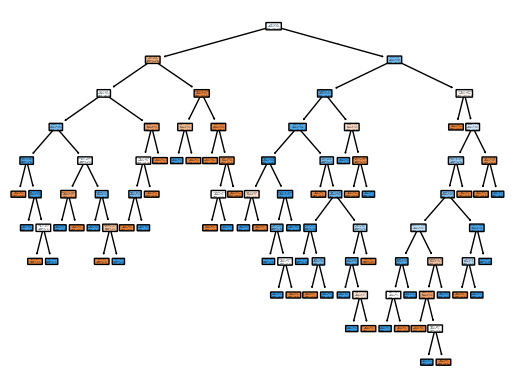

In [40]:
dc2=DecisionTreeClassifier(max_depth=best_depth)
dc2.fit(x_train,y_train)
y_pred2=dc.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))
plot_tree(dc2,filled=True,feature_names=df.drop('target',axis=1).columns,class_names=['no disease','disease'],rounded=True)

Training random forest algo


In [41]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=45)
rf.fit(x_train,y_train)
y_pred3=rf.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

0.9853658536585366
[[102   0]
 [  3 100]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



Comparision

In [43]:
print("Model Comparison:")
print(f"- Decision Tree Accuracy: {dc2.score(x_test, y_test)}")
print(f"- Random Forest Accuracy: {rf.score(x_test, y_test)}")

Model Comparison:
- Decision Tree Accuracy: 0.9853658536585366
- Random Forest Accuracy: 0.9853658536585366


In [48]:
rf_importances = pd.Series(rf.feature_importances_, index=x_train.columns)
dt_importances = pd.Series(dc2.feature_importances_, index=x_train.columns)

In [49]:
rf_importances

,0
age,0.085719
sex,0.031369
cp,0.143475
trestbps,0.062737
chol,0.075905
fbs,0.009157
restecg,0.017179
thalach,0.118349
exang,0.054293
oldpeak,0.117956


In [50]:
dt_importances

,0
age,0.068176
sex,0.031012
cp,0.280383
trestbps,0.047069
chol,0.085111
fbs,0.000000
restecg,0.009766
thalach,0.065733
exang,0.018866
oldpeak,0.093689


Top 5 features

In [52]:
print(rf_importances.sort_values(ascending=False).head(5))
print(dt_importances.sort_values(ascending=False).head(5))

cp         0.143475
ca         0.134893
thalach    0.118349
oldpeak    0.117956
thal       0.110951
dtype: float64
cp         0.280383
thal       0.147141
ca         0.118901
oldpeak    0.093689
chol       0.085111
dtype: float64


Cross val evaluation

In [53]:
from sklearn.model_selection import cross_val_score

In [54]:
dt_scores = cross_val_score(dc2, x_train, y_train, cv=10)
rf_scores = cross_val_score(rf, x_train, y_train, cv=10)

In [56]:
dt_scores

array([0.97560976, 1.        , 0.97560976, 0.98780488, 1.        ,
       1.        , 0.96341463, 0.98780488, 0.97560976, 1.        ])

In [57]:
rf_scores

array([1.        , 1.        , 0.97560976, 0.98780488, 1.        ,
       1.        , 0.98780488, 0.98780488, 0.96341463, 1.        ])

{'whiskers': [<matplotlib.lines.Line2D at 0x7bd6ae751750>,
 'caps': [<matplotlib.lines.Line2D at 0x7bd6ae7b3750>,
 'boxes': [<matplotlib.lines.Line2D at 0x7bd6ae751010>,
 'medians': [<matplotlib.lines.Line2D at 0x7bd6ae717650>,
 'fliers': [<matplotlib.lines.Line2D at 0x7bd6ae75b590>,
 'means': []}

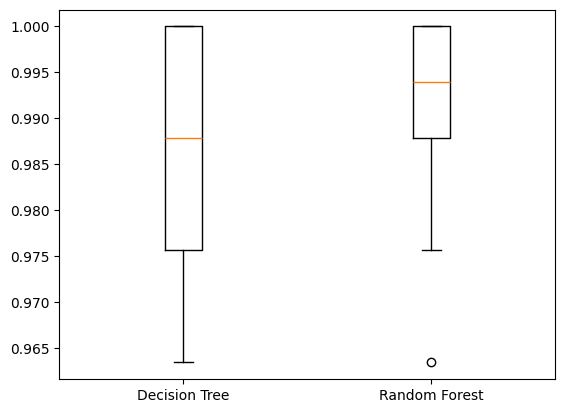

In [58]:
plt.boxplot([dt_scores, rf_scores], labels=["Decision Tree", "Random Forest"])

In [60]:
dt_scores.mean()


np.float64(0.9865853658536586)

In [61]:
rf_scores.mean()

np.float64(0.9902439024390244)